Brandon O'Neill<br>
ENGL 3246<br>
Fandom Project<br>
Summer 2020<br>


# Fandom Project: Sentiment Analysis of South Park Characters <br>

For my fandom project, I wanted to try some sort of data analysis. I found a dataset on Kaggle containing all the lines from all the characters of South Park. I plan on running a sentiment analysis over each characters, seeing which ones are the most negative/positive, most frequently used words and by which characters and just generally explore what the data shows. Sentiment analysis runs through each word and judges whether the word is positive or negative. 

## The Data
The data was imported from Kaggle and is a csv file containing all lines from South Park. This was then loaded into a dataframe using pandas and python.

In [57]:
import pandas as pd

df = pd.read_csv('All_Seasons.csv')
df['Line']=df['Line'].str.strip()
df.head()


,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away."
1,10,1,Kyle,Going away? For how long?
2,10,1,Stan,Forever.
3,10,1,Chef,I'm sorry boys.
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


There are lots of characters throughout South Park, but many of them may only show up once or twice. For this study, I want to focus on just the top 10 characters.

In [58]:
n = 10
characters = df['Character'].value_counts()[:n].index.tolist()
chars = pd.DataFrame(df['Character'].value_counts()[:n].tolist(),characters, columns=['# of Lines'])
chars

,# of Lines
Cartman,9774
Stan,7680
Kyle,7099
Butters,2602
Randy,2467
Mr. Garrison,1002
Chef,917
Kenny,881
Sharon,862
Mr. Mackey,633


From this data you can see that Cartman has the most lines at 9774. From here I will break down the lines by character and run the sentiment analysis.

## Sentiment Analysis
I am using a sentiment analysis tool called Afinn that scores each line from -5 to +5, where +5 is a very positive statement and -5 is a very negative statement. This was run through each line of the top 10 characters and displayed in a new "Score" column.

In [94]:
from afinn import Afinn
afinn = Afinn(language='en')

cart = df.loc[df['Character'].isin(characters)].copy()

cartLines = cart['Line']
scores = []
for each in cartLines:
    scores.append(afinn.score(each))

cart['Scores'] = scores
cart.head(10)

,Season,Episode,Character,Line,Score,Scores
0,10,1,Stan,"You guys, you guys! Chef is going away.",0.0,0.0
1,10,1,Kyle,Going away? For how long?,0.0,0.0
2,10,1,Stan,Forever.,0.0,0.0
3,10,1,Chef,I'm sorry boys.,0.0,-1.0
4,10,1,Stan,"Chef said he's been bored, so he joining a gro...",0.0,3.0
5,10,1,Chef,Wow!,0.0,4.0
7,10,1,Chef,What's the meaning of life? Why are we here?,0.0,0.0
9,10,1,Cartman,I'm gonna miss him. I'm gonna miss Chef and I...,0.0,-4.0
10,10,1,Stan,"Dude, how are we gonna go on? Chef was our fuh...",0.0,0.0
14,10,1,Mr. Mackey,So long!,0.0,0.0


The scores for each line of the top 10 characters has now been added to the data frame. From here I will look into what these scores mean. First I will look at each character overall and then see how each character has changed over the seasons.

Character
Butters          565.0
Cartman        -1962.0
Chef             -14.0
Kenny           -224.0
Kyle           -1054.0
Mr. Garrison    -228.0
Mr. Mackey       -19.0
Randy            422.0
Sharon           205.0
Stan            -573.0
Name: Scores, dtype: float64


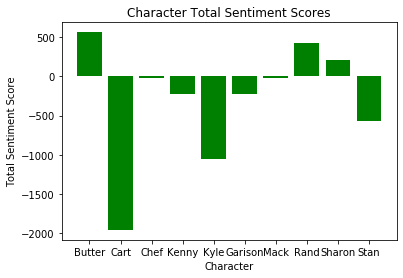

In [128]:
import matplotlib.pyplot as plt
print(cart.groupby('Character')['Scores'].sum())
charact = ["Butter", "Cart", "Chef", "Kenny", "Kyle", "Garison", "Mack","Rand", "Sharon", "Stan"]
plt.bar(characters, a, color = 'green')
plt.xlabel("Character")
plt.ylabel("Total Sentiment Score")
plt.title("Character Total Sentiment Scores")
x_pos = [i for i, _ in enumerate(charact)]
plt.xticks(x_pos, charact)

plt.show()

After running the sentiment analysis over all the lines of each character,  there are some interesting results. It is clear that Cartman is the most negative throughout the show. But there are also characters who remain relatively neutral like Chef and Mr Mackey. The parents Randy and Sharon have positive sentiments as does Butters. <br>

When watching the show, the data makes sense. Butters is usually the innocent one and Cartman always has some evil plan going on. Stan and Kyle are negative in their own way usually with a pessimistic outlook on the situation. The neutral characters like Chef and Mr Mackey are usually there to offer advice on the situation. Randy and Sharon are usually blissfully ignorant to what is happening. These character traits are supported by the sentiment analysis.<br>

Next I will investigate if any characters changed dramatically from season to season.

In [146]:
cart = cart.sort_values(by=['Season'], ascending=True)
b = cart.loc[cart['Character'] =='Cartman']
c=b.groupby('Season')['Scores'].sum().reset_index()
c.sort_values(by=['Season'], ascending=True)

,Season,Scores
0,1,-608.0
1,10,-173.0
2,11,-132.0
3,12,-256.0
4,13,92.0
5,14,-235.0
6,15,-143.0
7,16,-317.0
8,17,13.0
9,18,-107.0


This shows the character Cartman's sentiment scores for each season. I will now graph this data and see how the character changes over the seasons.

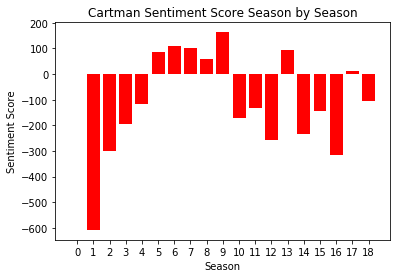

In [158]:
seasons = [i for i in range(0,19)]
sentiment = [0,-608.0,-302.0,-195.0,-116.0,85.0,110.0,101.0,58.0,163.0,-173.0,-132.0,-256.0,92.0,-235.0,-143.0,
             -317.0,13.0,-107.0]

plt.bar(seasons, sentiment, color = 'red')
plt.xlabel("Season")
plt.ylabel("Sentiment Score")
plt.title("Cartman Sentiment Score Season by Season")
x_pos = [i for i, _ in enumerate(seasons)]
plt.xticks(x_pos, seasons)

plt.show()


Cartman seems to have one of the more dramatic sentiment arcs out of all the characters. Starting in season 1, he is extremely negative in terms of sentiment score. This could be the creators setting the tone for how each character should be viewed. From season 2 to season 9, his character becomes more and more positive. My theory is that they were trying to make the characters more than just one dimensional. Season 10 onward, the character sentiment remains negative. The outliers of season 13 and 17 could be caused by different plots or sarcasm being taken literal by the sentiment analysis.

# Reflection
Overall, the sentiment analysis was much more time consuming than I originally thought it would be. I learned quite a bit about sentiment analysis and it was interesting to see how the data accurately reflected some of the character traits that come up when watching the show. I hope you enjoyed this little intro to South Park Sentiment Analysis.